# Without Batch Normalization

This is an implementation from the Youtube Channel - https://www.youtube.com/@datafuseanalytics

Epoch 1/20
391/391 [==============================] - 5s 8ms/step - loss: 1.5321 - accuracy: 0.4521 - val_loss: 1.3106 - val_accuracy: 0.5339
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 1.1621 - accuracy: 0.5905 - val_loss: 1.0570 - val_accuracy: 0.6305
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 1.0106 - accuracy: 0.6482 - val_loss: 0.9845 - val_accuracy: 0.6571
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 0.9142 - accuracy: 0.6837 - val_loss: 0.9236 - val_accuracy: 0.6778
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 0.8414 - accuracy: 0.7071 - val_loss: 0.9271 - val_accuracy: 0.6842
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 0.7820 - accuracy: 0.7296 - val_loss: 0.8796 - val_accuracy: 0.6968
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 0.7274 - accuracy: 0.7464 - val_loss: 0.8977 - val_accuracy: 0.6895
Epoch 

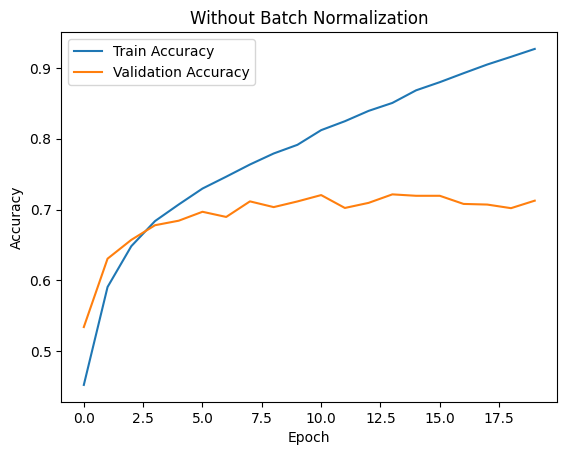

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

'''
- `numpy` (as `np`) for numerical operations.
    - `matplotlib.pyplot` (as `plt`) for plotting graphs.
    - `cifar10` dataset from Keras, which provides CIFAR-10 dataset.
    - Necessary components from Keras to build and train neural networks, including `Sequential` model,
    convolutional (`Conv2D`) and pooling (`MaxPooling2D`) layers, `Flatten` layer to flatten the input,
    `Dense` layer for fully connected layers, and `to_categorical` function for one-hot encoding.
'''

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#- It loads the CIFAR-10 dataset into four variables: `x_train`, `y_train`, `x_test`, and `y_test`.

# Preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
#Converts pixel values to floating-point numbers and normalizes them to a range between 0 and 1.
#One-hot encodes the labels (y_train and y_test) using to_categorical function. CIFAR-10 has 10 classes,
#so this converts categorical labels into vectors of binary values.



# Define model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
'''
    - The model is defined as a sequential stack of layers.
    - It starts with a `Conv2D` layer with 32 filters, each of size 3x3, using ReLU activation function,
    with padding to maintain spatial dimensions, and input shape of 32x32x3 (RGB images).
    - It's followed by a `MaxPooling2D` layer with pool size of 2x2, which downsamples the input along the spatial dimensions.
    - Then, another `Conv2D` layer with 64 filters, followed by another `MaxPooling2D` layer.
    - The output of these convolutional and pooling layers is then flattened into a 1D array using `Flatten`.
    - Then, there are two fully connected (`Dense`) layers with 128 neurons each, followed by the output layer with 10 neurons (equal to the number of classes in CIFAR-10) and softmax activation function to output class probabilities.
'''

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#The model is compiled using the Adam optimizer and categorical cross-entropy loss function.
#Accuracy is chosen as the metric to monitor during training.


# Train model
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))
#The model is trained using `model.fit` function for 20 epochs with a batch size of 128.
#Training data and validation data are provided. Training history is stored in the `history` variable.

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Without Batch Normalization')
plt.legend()
plt.show()

#Finally, it plots the training and validation accuracy over epochs using `matplotlib.pyplot`.
#This helps visualize how the model's performance changes during training.

# With Batch Normalization

Epoch 1/20
391/391 [==============================] - 6s 9ms/step - loss: 1.1927 - accuracy: 0.5822 - val_loss: 3.1648 - val_accuracy: 0.2224
Epoch 2/20
391/391 [==============================] - 3s 9ms/step - loss: 0.8248 - accuracy: 0.7126 - val_loss: 0.9407 - val_accuracy: 0.6694
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 0.6500 - accuracy: 0.7741 - val_loss: 0.9992 - val_accuracy: 0.6685
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 0.5085 - accuracy: 0.8262 - val_loss: 1.1293 - val_accuracy: 0.6450
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 0.3798 - accuracy: 0.8727 - val_loss: 1.0439 - val_accuracy: 0.6831
Epoch 6/20
391/391 [==============================] - 3s 9ms/step - loss: 0.2679 - accuracy: 0.9132 - val_loss: 1.1693 - val_accuracy: 0.6772
Epoch 7/20
391/391 [==============================] - 3s 8ms/step - loss: 0.1807 - accuracy: 0.9438 - val_loss: 1.4463 - val_accuracy: 0.6421
Epoch 

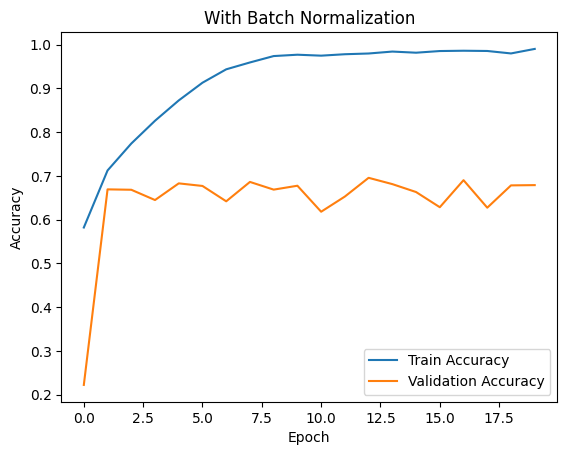

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('With Batch Normalization')
plt.legend()
plt.show()


Epoch 1/20
391/391 [==============================] - 6s 9ms/step - loss: 1.2110 - accuracy: 0.5785 - val_loss: 5.1920 - val_accuracy: 0.1274
Epoch 2/20
391/391 [==============================] - 3s 9ms/step - loss: 0.8335 - accuracy: 0.7090 - val_loss: 1.1031 - val_accuracy: 0.6208
Epoch 3/20
391/391 [==============================] - 3s 7ms/step - loss: 0.6615 - accuracy: 0.7699 - val_loss: 1.2011 - val_accuracy: 0.6312
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 0.5251 - accuracy: 0.8202 - val_loss: 0.9872 - val_accuracy: 0.6772
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 0.3877 - accuracy: 0.8679 - val_loss: 0.9867 - val_accuracy: 0.7068
Epoch 6/20
391/391 [==============================] - 3s 8ms/step - loss: 0.2763 - accuracy: 0.9089 - val_loss: 1.1593 - val_accuracy: 0.6711
Epoch 7/20
391/391 [==============================] - 3s 8ms/step - loss: 0.1874 - accuracy: 0.9421 - val_loss: 1.3590 - val_accuracy: 0.6731
Epoch 

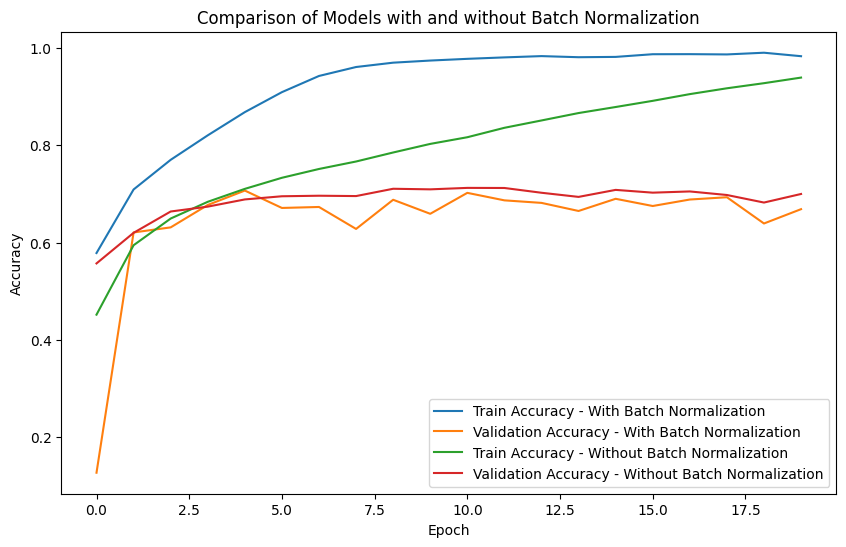

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define models
model_with_bn = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

model_without_bn = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

models = [model_with_bn, model_without_bn]
model_names = ['With Batch Normalization', 'Without Batch Normalization']

# Compile models
for model in models:
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train models
histories = []
for model in models:
    history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))
    histories.append(history)

# Plot training and validation accuracy for both models
plt.figure(figsize=(10, 6))
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Train Accuracy - {model_names[i]}')
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy - {model_names[i]}')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Comparison of Models with and without Batch Normalization')
plt.legend()
plt.show()


We can clearly see that the model converges faster using Batch Normalization

